In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
api_key = "e6c2dcac68d04b15a9370607241110"
base_url = "http://api.weatherapi.com/v1/forecast.json"
city = "Nairobi"
forecast_days = 8  # Number of forecast days

In [3]:
url = f"{base_url}?key={api_key}&q={city}&days={forecast_days}&aqi=no&alerts=no"

In [4]:
response = requests.get(url)

In [5]:
if response.status_code == 200:
    forecast_data = response.json()
else:
    print(f"Failed to retrieve data: {response.status_code}")
    forecast_data = {}

In [6]:
forecast_days_data = forecast_data.get('forecast', {}).get('forecastday', [])

In [7]:
dates = []
temperatures = []
humidities = []
wind_speeds = []

In [8]:
for day in forecast_days_data:
    dates.append(day['date'])
    temperatures.append(day['day']['avgtemp_c'])  # Average temperature in Celsius
    humidities.append(day['day']['avghumidity'])  # Average humidity in percentage
    wind_speeds.append(day['day']['maxwind_kph'])

In [19]:
df_forecast = pd.DataFrame({
    'Date': dates,
    'Average Temperature (C)': temperatures,
    'Average Humidity (%)': humidities,
    'Max Wind Speed (kph)': wind_speeds
})

In [20]:
print(df_forecast)

         Date  Average Temperature (C)  Average Humidity (%)  \
0  2024-10-14                     20.1                    55   
1  2024-10-15                     21.5                    52   
2  2024-10-16                     22.0                    48   
3  2024-10-17                     22.2                    39   
4  2024-10-18                     21.2                    55   
5  2024-10-19                     20.6                    66   
6  2024-10-20                     21.0                    61   
7  2024-10-21                     21.5                    54   

   Max Wind Speed (kph)  
0                  15.5  
1                  15.8  
2                  25.2  
3                  19.8  
4                  16.6  
5                  14.0  
6                  14.8  
7                  15.8  


In [22]:
# Re-plot the provided data in the same format
df_forecast = df_forecast.to_dict(orient = 'list')
df_forecast

{'Date': ['2024-10-14',
  '2024-10-15',
  '2024-10-16',
  '2024-10-17',
  '2024-10-18',
  '2024-10-19',
  '2024-10-20',
  '2024-10-21'],
 'Average Temperature (C)': [20.1, 21.5, 22.0, 22.2, 21.2, 20.6, 21.0, 21.5],
 'Average Humidity (%)': [55, 52, 48, 39, 55, 66, 61, 54],
 'Max Wind Speed (kph)': [15.5, 15.8, 25.2, 19.8, 16.6, 14.0, 14.8, 15.8]}

In [23]:
print(df_forecast)

{'Date': ['2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18', '2024-10-19', '2024-10-20', '2024-10-21'], 'Average Temperature (C)': [20.1, 21.5, 22.0, 22.2, 21.2, 20.6, 21.0, 21.5], 'Average Humidity (%)': [55, 52, 48, 39, 55, 66, 61, 54], 'Max Wind Speed (kph)': [15.5, 15.8, 25.2, 19.8, 16.6, 14.0, 14.8, 15.8]}


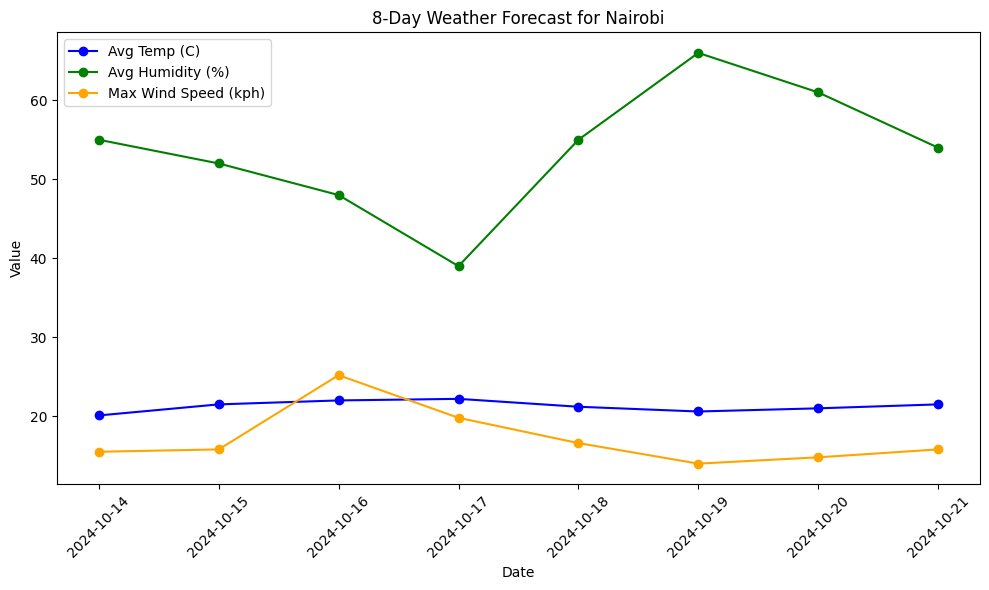

In [25]:
# Plot the forecast data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot temperature, humidity, and wind speed as line charts
ax.plot(df_forecast['Date'], df_forecast['Average Temperature (C)'], label='Avg Temp (C)', color='blue', marker='o')
ax.plot(df_forecast['Date'], df_forecast['Average Humidity (%)'], label='Avg Humidity (%)', color='green', marker='o')
ax.plot(df_forecast['Date'], df_forecast['Max Wind Speed (kph)'], label='Max Wind Speed (kph)', color='orange', marker='o')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('8-Day Weather Forecast for Nairobi')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()